# Eksploracyjna analiza danych

In [1]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
with open('../data/processed/exploration_data.pkl', 'rb') as f:
    data = pickle.load(f)

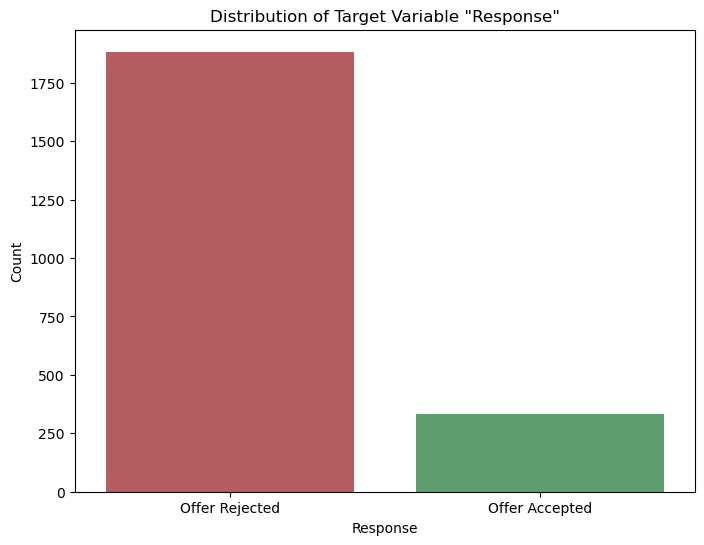

In [ ]:
# Get the count of each class in the target variable
response_counts = data['Response'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, hue=response_counts.index, palette=['#c44e52', '#55a868'], legend=False)
plt.title('Distribution of Target Variable "Response"')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'])
plt.show()


In [23]:
print(sns.color_palette('deep').as_hex())
sns.color_palette('deep')


['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]